In [38]:
import numpy as np
import matplotlib.pylab as plt

kernel=str(99)

out_mpi=[]
f=open('time_strong_mpi'+kernel, "r")
file=f.readlines()
f.close()
summ=0
count=1
for i in range(len(file)):
    if( file[i][0]=='#' ):
        out_mpi.append(summ/count)
        summ=0
        count=0
        continue
    summ += float(file[i][4:]) 
    count += 1
out_mpi.append(summ/count)
out_mpi.remove(0)
out_mpi=np.asarray(out_mpi)

P=[]
out_opm=[]
f=open('time_strong_opm'+kernel, "r")
file=f.readlines()
f.close()
for i in range(len(file)):
    if( file[i][0]!='#'):
        out_opm.append(float(file[i][0:]))
    else:
        tmp = file[i].replace("#####", "")
        tmp = tmp.replace("threads", "")
        P.append(int(tmp))
out_opm=np.asarray(out_opm)
P=np.asarray(P)

S_mpi=out_mpi[0]/out_mpi
S_opm=out_opm[0]/out_opm

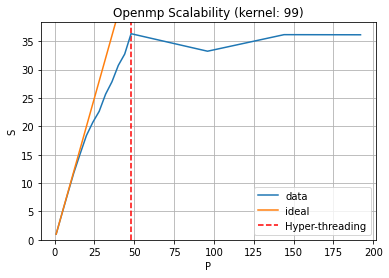

In [39]:
_=plt.plot(P,S_opm, label='data')
_=plt.plot(P,P, label='ideal')
_=plt.vlines(48,0,max(S_opm+2), linestyle='dashed', colors='r', label='Hyper-threading')
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("S")
_=plt.ylim(0,max(S_opm+2))
_=plt.title("Openmp Scalability (kernel: "+kernel+")")
_=plt.grid()

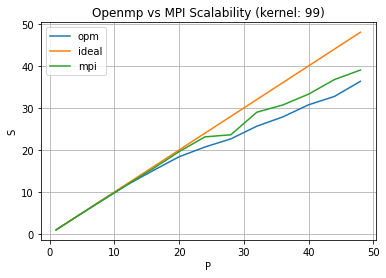

In [40]:
_=plt.plot(P[0:13],S_opm[0:13], label='opm')
_=plt.plot(P[0:13],P[0:13], label='ideal')
_=plt.plot(P[0:13],S_mpi, label='mpi')
_=plt.legend() ; _=plt.xlabel("P") ; _=plt.ylabel("S")
_=plt.title("Openmp vs MPI Scalability (kernel: "+kernel+")")
_=plt.grid()

In [32]:
P

array([  1,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        96, 144, 192])